# Jupyter-Notebook for Preprocessing of Ammonia Emission Data

Jupyter Notebook is an interactive web application for developing and running Python code. 
Data visualization is possible via matplotlib. 

#### Load Packages: 

In [1]:
# This is a comment inside a code block

import numpy as np                 # package for numerics
import pandas as pd                # package for data frames  
import matplotlib.pyplot as plt    # package for plotting
import seaborn as sns              # package for statistical data visualization

from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

#### Load data from text file (csv) into a "data frame":

In [2]:
df = pd.read_csv("data.dat", sep = "\t")   # Import data

# display style
#%matplotlib notebook 
%matplotlib inline

df.head()  # show data

,Temp,date,dt,vW,dW,method,ef,aer,wd,lg_aer,lg_ef,season1,season2,season3,h,t,season4
0,NaN,26MAR2017,26MAR2017:01:00:00,NaN,NaN,1,NaN,NaN,N,NaN,NaN,T,W,T,1,3481,2
1,NaN,26MAR2017,26MAR2017:01:00:00,NaN,NaN,4,NaN,NaN,N,NaN,NaN,T,W,T,1,3481,2
2,-4.25,07JAN2017,07JAN2017:00:00:00,3.131030,171.458493,1,0.688103,869.807785,S,6.768272,-0.373816,W,W,W,0,1608,3
3,-4.25,07JAN2017,07JAN2017:00:00:00,3.131030,171.458493,4,0.894573,1066.181569,S,6.971839,-0.111409,W,W,W,0,1608,3
4,-4.25,07JAN2017,07JAN2017:01:00:00,3.067847,170.816279,1,0.915220,978.914308,S,6.886444,-0.088591,W,W,W,1,1609,3


In [3]:
# drop NaN-entries
df.dropna(axis=0, inplace=True)

# drop out useless coloums:
df.drop(["date", "aer", "lg_aer", "season1", "season2", "season3"], axis = 1, inplace = True)

# Filter out lines method 1 (or method 4):  
df = df[df["method"] == 4]      #  <=========================================================== change here !!!

print(df.shape)
df.head()  # show data

(6699, 11)


,Temp,dt,vW,dW,method,ef,wd,lg_ef,h,t,season4
3,-4.250000,07JAN2017:00:00:00,3.131030,171.458493,4,0.894573,S,-0.111409,0,1608,3
5,-4.250000,07JAN2017:01:00:00,3.067847,170.816279,4,0.822711,S,-0.195150,1,1609,3
7,-4.166667,06JAN2017:07:00:00,0.232305,265.334562,4,0.951645,W,-0.049563,7,1591,3
9,-4.166667,06JAN2017:23:00:00,2.793973,167.170282,4,1.008360,S,0.008325,23,1607,3
11,-3.833333,07JAN2017:02:00:00,3.004871,169.241061,4,0.787977,S,-0.238286,2,1610,3


Method 1 is messure point selection according to wind direction. 

Method 4 averages over all messure points inside the barn according to VERA recommendation

#### Now lets visualize the data: Our target-data are the NH3-emission-factors (ef) respectively the logarith of NH3-ef  

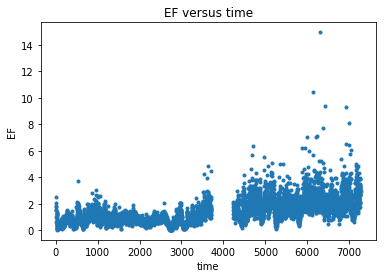

In [4]:
# Plot NH3-data versus index: 

plt.figure()
plt.title('EF versus time')
plt.xlabel('time')
plt.ylabel('EF')
plt.plot(df["t"], df["ef"], '.')
plt.show()

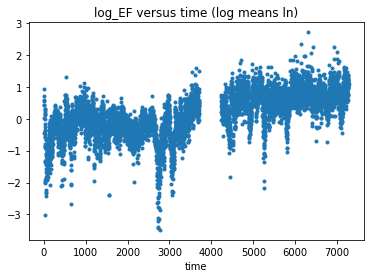

In [5]:
plt.figure()
plt.title('log_EF versus time (log means ln)')
plt.xlabel('time')
plt.ylabel('')
plt.plot(df["t"], df["lg_ef"], '.')
plt.show()

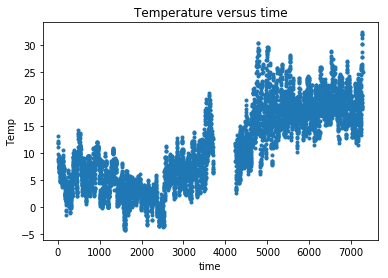

In [6]:
plt.figure()
plt.title('Temperature versus time')
plt.xlabel('time')
plt.ylabel('Temp')
plt.plot(df["t"], df["Temp"], '.')
plt.show()

#### Remark: log(x) means log_e(x), i.e. natural logarithm with e Euler' number

## Covariance Analysis / Visualization of Correlations

#### Pearson Correlation Coefficient:    pearsonr ( X,  Y )

Pearson Correl.Coef.:   0.6936504880360512


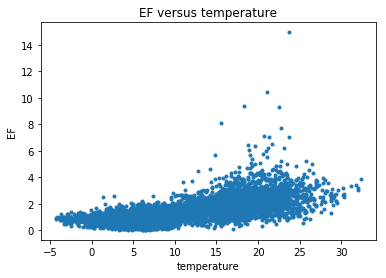

In [7]:
corr, _ = pearsonr(df["Temp"], df["ef"]) 
print("Pearson Correl.Coef.:  ", corr) 

plt.figure()
plt.title('EF versus temperature')
plt.xlabel('temperature')
plt.ylabel('EF')
plt.plot(df["Temp"], df["ef"],'.')
plt.show()

Pearson Correl.Coef.:   0.6703263548680112


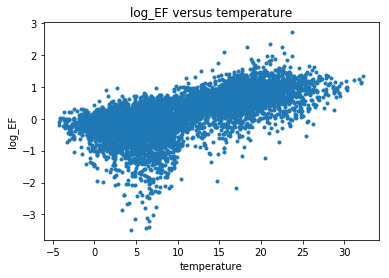

In [8]:
corr, _ = pearsonr(df["Temp"], df["lg_ef"]) 
print("Pearson Correl.Coef.:  ", corr) 

plt.figure()
plt.title('log_EF versus temperature')
plt.xlabel('temperature')
plt.ylabel('log_EF')
plt.plot(df["Temp"], df["lg_ef"],'.')
#plt.plot([-5, 30], [-0.5, 1.5], 'r')
plt.show()

#### It makes sense to continue with the logarithm of the NH3-data !!

Pearson Correl.Coef.:   -0.27523860122157556


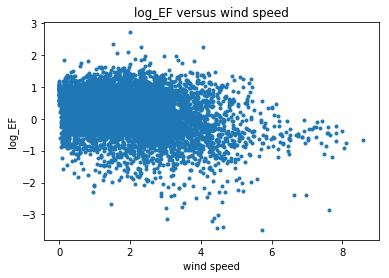

In [9]:
corr, _ = pearsonr(df["vW"], df["lg_ef"]) 
print("Pearson Correl.Coef.:  ", corr) 

plt.figure()
plt.title('log_EF versus wind speed')
plt.xlabel('wind speed')
plt.ylabel('log_EF')
plt.plot(df["vW"], df["lg_ef"],'.')
plt.show()

Pearson Correl.Coef.:   0.01553457730907747


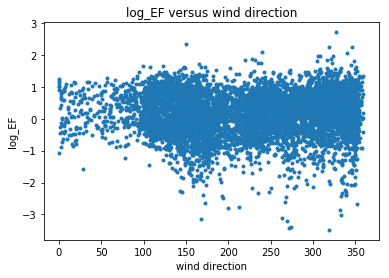

In [10]:
corr, _ = pearsonr(df["dW"], df["lg_ef"]) 
print("Pearson Correl.Coef.:  ", corr) 

plt.figure()
plt.title('log_EF versus wind direction')
plt.xlabel('wind direction')
plt.ylabel('log_EF')
plt.plot(df["dW"], df["lg_ef"],'.')
plt.show()

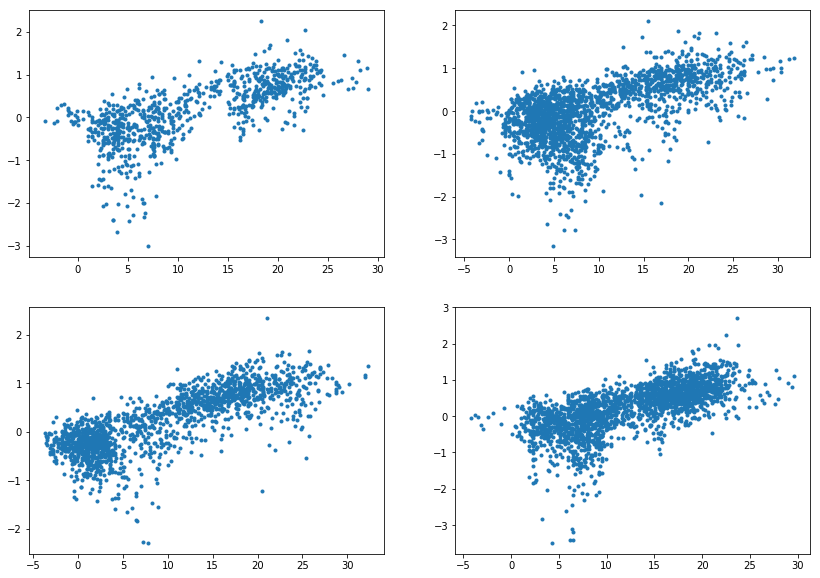

In [11]:
# Filter out wind direction:  

df1_N = df[df["wd"] == 'N']
df1_E = df[df["wd"] == 'E']
df1_S = df[df["wd"] == 'S']
df1_W = df[df["wd"] == 'W']

# corr_N, _ = pearsonr(df1_N["h"], df1["lg_ef"]) 
# print("Pearson Correl.Coef.:  ", corr) 

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

ax[0, 0].plot(df1_N["Temp"], df1_N["lg_ef"], '.') #row=0, col=0 
ax[1, 0].plot(df1_E["Temp"], df1_E["lg_ef"], '.') #row=1, col=0
ax[0, 1].plot(df1_S["Temp"], df1_S["lg_ef"], '.') #row=0, col=1
ax[1, 1].plot(df1_W["Temp"], df1_W["lg_ef"], '.') #row=1, col=1
plt.show()


Pearson Correl.Coef.:   0.3115626121369503
Pearson Correl.Coef.:   0.5432785939602292
Pearson Correl.Coef.:   -0.12146620402624703


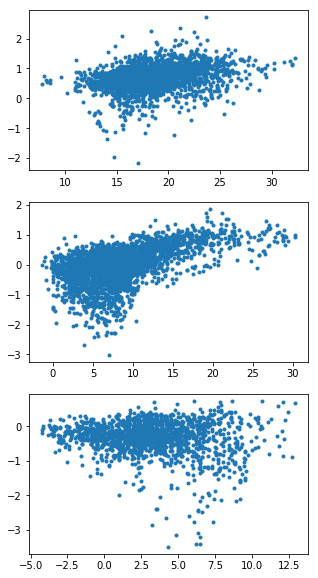

In [12]:
df_S1 = df[df["season4"] == 1]
df_S2 = df[df["season4"] == 2]
df_S3 = df[df["season4"] == 3]

corr, _ = pearsonr(df_S1["Temp"], df_S1["lg_ef"]) 
print("Pearson Correl.Coef.:  ", corr) 

corr, _ = pearsonr(df_S2["Temp"], df_S2["lg_ef"]) 
print("Pearson Correl.Coef.:  ", corr) 

corr, _ = pearsonr(df_S3["Temp"], df_S3["lg_ef"]) 
print("Pearson Correl.Coef.:  ", corr) 

fig, ax = plt.subplots(3, figsize=(5, 10))

ax[0].plot(df_S1["Temp"], df_S1["lg_ef"], '.')  
ax[1].plot(df_S2["Temp"], df_S2["lg_ef"], '.')  
ax[2].plot(df_S3["Temp"], df_S3["lg_ef"], '.')  
plt.show()

In [13]:
df.head()

,Temp,dt,vW,dW,method,ef,wd,lg_ef,h,t,season4
3,-4.250000,07JAN2017:00:00:00,3.131030,171.458493,4,0.894573,S,-0.111409,0,1608,3
5,-4.250000,07JAN2017:01:00:00,3.067847,170.816279,4,0.822711,S,-0.195150,1,1609,3
7,-4.166667,06JAN2017:07:00:00,0.232305,265.334562,4,0.951645,W,-0.049563,7,1591,3
9,-4.166667,06JAN2017:23:00:00,2.793973,167.170282,4,1.008360,S,0.008325,23,1607,3
11,-3.833333,07JAN2017:02:00:00,3.004871,169.241061,4,0.787977,S,-0.238286,2,1610,3


### Treatment of circular / periodic variables

In [14]:
# new coulumns: 
# h = day_time in hours
# t [days] = t [hours] // 24       (Integer division)

df["h_sin"] = df["h"]     
df["h_cos"] = df["h"]

df["t_sin"] = df["t"] // 24   
df["t_cos"] = df["t"] // 24

# new columns, wind direction:
df["dW_sin"] = df["dW"]
df["dW_cos"] = df["dW"]

# day_time [hours]
df["h_sin"] = np.sin(2*np.pi/24*df["h_sin"])  # Sine
df["h_cos"] = np.cos(2*np.pi/24*df["h_cos"])  # Cosine

# time [days]
df["t_sin"] = np.sin(2*np.pi/365.25*df["t_sin"])
df["t_cos"] = np.cos(2*np.pi/365.25*df["t_cos"])

# wind direction:
df["dW_sin"] = np.sin(2*np.pi/360*df["dW_sin"])
df["dW_cos"] = np.cos(2*np.pi/360*df["dW_cos"])

df.head()

,Temp,dt,vW,dW,method,ef,wd,lg_ef,h,t,season4,h_sin,h_cos,t_sin,t_cos,dW_sin,dW_cos
3,-4.250000,07JAN2017:00:00:00,3.131030,171.458493,4,0.894573,S,-0.111409,0,1608,3,0.000000,1.000000,0.913808,0.406147,0.148526,-0.988909
5,-4.250000,07JAN2017:01:00:00,3.067847,170.816279,4,0.822711,S,-0.195150,1,1609,3,0.258819,0.965926,0.913808,0.406147,0.159601,-0.987182
7,-4.166667,06JAN2017:07:00:00,0.232305,265.334562,4,0.951645,W,-0.049563,7,1591,3,0.965926,-0.258819,0.906686,0.421806,-0.996687,-0.081337
9,-4.166667,06JAN2017:23:00:00,2.793973,167.170282,4,1.008360,S,0.008325,23,1607,3,-0.258819,0.965926,0.906686,0.421806,0.222054,-0.975034
11,-3.833333,07JAN2017:02:00:00,3.004871,169.241061,4,0.787977,S,-0.238286,2,1610,3,0.500000,0.866025,0.913808,0.406147,0.186677,-0.982421


In [15]:
df.drop(["dW", "h"], axis = 1, inplace = True)

df.head()

,Temp,dt,vW,method,ef,wd,lg_ef,t,season4,h_sin,h_cos,t_sin,t_cos,dW_sin,dW_cos
3,-4.250000,07JAN2017:00:00:00,3.131030,4,0.894573,S,-0.111409,1608,3,0.000000,1.000000,0.913808,0.406147,0.148526,-0.988909
5,-4.250000,07JAN2017:01:00:00,3.067847,4,0.822711,S,-0.195150,1609,3,0.258819,0.965926,0.913808,0.406147,0.159601,-0.987182
7,-4.166667,06JAN2017:07:00:00,0.232305,4,0.951645,W,-0.049563,1591,3,0.965926,-0.258819,0.906686,0.421806,-0.996687,-0.081337
9,-4.166667,06JAN2017:23:00:00,2.793973,4,1.008360,S,0.008325,1607,3,-0.258819,0.965926,0.906686,0.421806,0.222054,-0.975034
11,-3.833333,07JAN2017:02:00:00,3.004871,4,0.787977,S,-0.238286,1610,3,0.500000,0.866025,0.913808,0.406147,0.186677,-0.982421


### Normalization of input-data ?!

Not here, because the normalization should be done on the basis of mean and std of the TRAIN samples, nor including the TEST set, because that would cause a bias. Hence, it has to be done inside the cross-validation!!


In [16]:
# sort data chronologically
df_sort = df.sort_values(by = ['t'])

# print preprocessed data to a file:

#df_sort.to_csv('Dumm_meth_1.dat', header=True, index=False, sep=' ', mode='w')
df_sort.to_csv('Dumm_meth_4.dat', header=True, index=False, sep=' ', mode='w')

df_sort.head()

,Temp,dt,vW,method,ef,wd,lg_ef,t,season4,h_sin,h_cos,t_sin,t_cos,dW_sin,dW_cos
9255,13.175000,01NOV2016:11:00:00,2.134214,4,0.637836,W,-0.449675,11,2,2.588190e-01,-0.965926,0.0,1.0,-0.999999,0.001241
8855,12.100000,01NOV2016:12:00:00,2.636442,4,1.025845,W,0.025517,12,2,1.224647e-16,-1.000000,0.0,1.0,-0.887852,0.460130
8737,11.891667,01NOV2016:13:00:00,3.602638,4,1.536756,W,0.429674,13,2,-2.588190e-01,-0.965926,0.0,1.0,-0.723579,0.690241
8707,11.833333,01NOV2016:14:00:00,2.994724,4,2.530530,W,0.928429,14,2,-5.000000e-01,-0.866025,0.0,1.0,-0.719382,0.694614
8433,11.166667,01NOV2016:15:00:00,2.947266,4,1.543225,W,0.433874,15,2,-7.071068e-01,-0.707107,0.0,1.0,-0.778862,0.627195


### Check if sin-cos data-transformation worked correctly (you should see circles) 

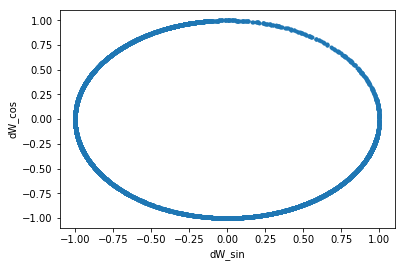

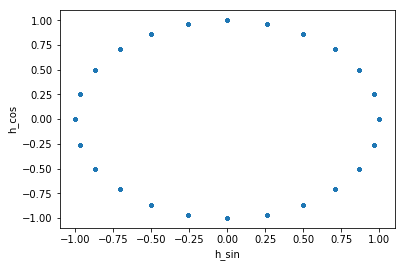

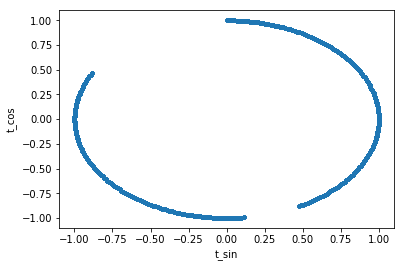

In [17]:
plt.figure()
plt.xlabel('dW_sin')
plt.ylabel('dW_cos')
plt.plot(df["dW_sin"], df["dW_cos"], '.')
plt.show()

plt.figure()
plt.xlabel('h_sin')
plt.ylabel('h_cos')
plt.plot(df["h_sin"], df["h_cos"], '.')
plt.show()

plt.figure()
plt.xlabel('t_sin')
plt.ylabel('t_cos')
plt.plot(df["t_sin"], df["t_cos"], '.')
plt.show()